In [106]:
import numpy as np 
import sep 
%matplotlib inline 

In [107]:
import matplotlib.pyplot as plt 
from astropy.io import fits
from matplotlib import rcParams 

rcParams['figure.figsize']  = [10.,8.]

In [108]:
data = fits.getdata('imagesep.fits')

ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]


fname = 'imagesep.fits'
hdu_list = fits.open(fname)
hdu_list.info()

fits.getdata(fname)

image_data = hdu_list[0].data

hdu_list.close()

image_data = fits.getdata(fname)

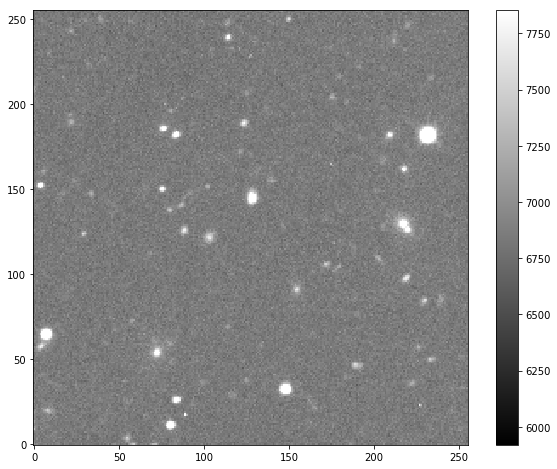

In [109]:
m , s = np.mean(image_data), np.std(image_data)
plt.imshow(image_data, interpolation = 'nearest', cmap ='gray', vmin=m-s, vmax= m+s, origin = 'lower')
plt.colorbar()

In [110]:
bkg = sep.Background(image_data)

In [111]:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [112]:
#bkg_image = bkg.back()
bkg_image = np.array(bkg)

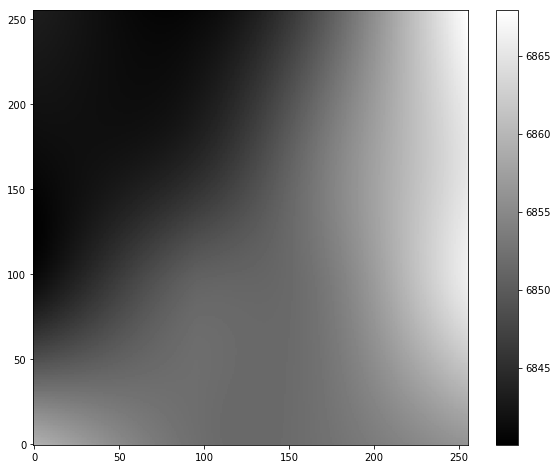

In [113]:
plt.imshow(bkg_image, interpolation = 'nearest', cmap ='gray', origin = 'lower')
plt.colorbar()

In [114]:
bkg_rms = bkg.rms()

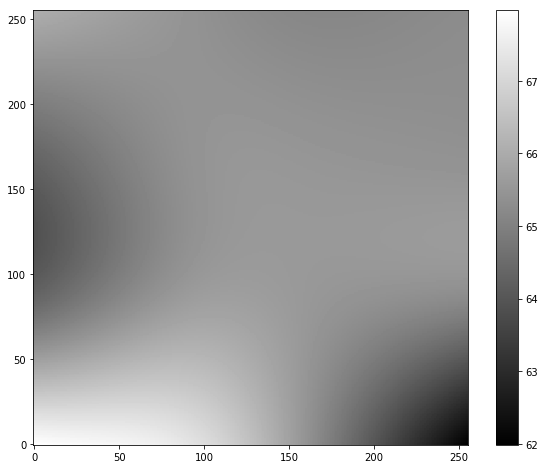

In [115]:
plt.imshow(bkg_rms, interpolation = 'nearest', cmap = 'gray', origin = 'lower')
plt.colorbar()

In [116]:
data_sub = image_data-bkg

In [117]:
objects = sep.extract(data_sub, 1.5, err = bkg.globalrms)

In [118]:
len(objects)

69

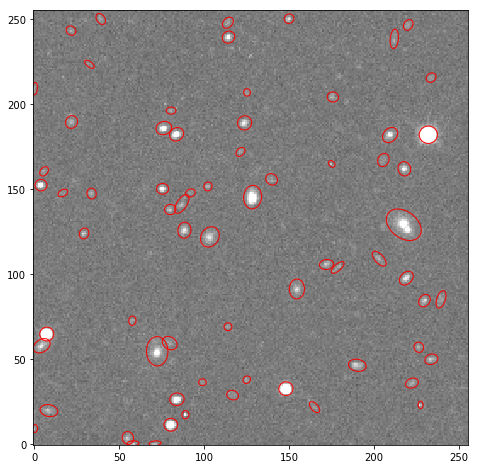

In [119]:
from matplotlib.patches import Ellipse 

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation = 'nearest', cmap = 'gray', 
               vmin=m-s, vmax= m+s, origin ='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [120]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [121]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [122]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
